# **Exploratory Data Analysis**

**Dataset** : [Dataset UTD_19](https://utd19.ethz.ch)<br>
**City** : Madrid

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
df = pd.read_csv('madrid.csv')
df.head()

,day,interval,detid,flow,occ,error,city,speed
0,2017-11-03,31800,1001,160.000000,0.010000,1.0,madrid,NaN
1,2017-11-03,32100,1001,133.333333,0.010000,1.0,madrid,NaN
2,2017-11-03,32400,1001,150.000000,0.015000,1.0,madrid,NaN
3,2017-11-03,32700,1001,140.000000,0.013333,1.0,madrid,NaN
4,2017-11-03,33000,1001,120.000000,0.010000,1.0,madrid,NaN


In [3]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070083 entries, 0 to 5070082
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   day       object 
 1   interval  int64  
 2   detid     int64  
 3   flow      float64
 4   occ       float64
 5   error     float64
 6   city      object 
 7   speed     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 309.5+ MB


day          object
interval      int64
detid         int64
flow        float64
occ         float64
error       float64
city         object
speed       float64
dtype: object

In [4]:
df.shape

(5070083, 8)

In [5]:
df.columns

Index(['day', 'interval', 'detid', 'flow', 'occ', 'error', 'city', 'speed'], dtype='object')

In [6]:
df.describe()

,interval,detid,flow,occ,error,speed
count,5.070083e+06,5.070083e+06,5.070083e+06,5.070083e+06,1625872.0,0.0
mean,4.266197e+04,3.315081e+04,5.184987e+02,9.000367e-02,1.0,NaN
std,2.491804e+04,2.873582e+04,3.565723e+03,2.932011e-01,0.0,NaN
min,0.000000e+00,1.001000e+03,-1.000000e+00,-1.000000e-02,1.0,NaN
25%,2.130000e+04,1.100200e+04,8.000000e+01,5.000000e-03,1.0,NaN
50%,4.230000e+04,1.900200e+04,2.700000e+02,3.000000e-02,1.0,NaN
75%,6.420000e+04,6.105800e+04,6.800000e+02,7.666667e-02,1.0,NaN
max,8.610000e+04,9.759700e+04,9.024030e+05,1.940400e+02,1.0,NaN


In [7]:
df.drop('speed',axis=1,inplace=True)
df.drop('error', axis=1, inplace=True)

In [8]:
df.head()

,day,interval,detid,flow,occ,city
0,2017-11-03,31800,1001,160.000000,0.010000,madrid
1,2017-11-03,32100,1001,133.333333,0.010000,madrid
2,2017-11-03,32400,1001,150.000000,0.015000,madrid
3,2017-11-03,32700,1001,140.000000,0.013333,madrid
4,2017-11-03,33000,1001,120.000000,0.010000,madrid


In [9]:
df.isnull().sum()

day         0
interval    0
detid       0
flow        0
occ         0
city        0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [19]:
print(df['flow'].describe())

count    5.070083e+06
mean     5.184987e+02
std      3.565723e+03
min     -1.000000e+00
25%      8.000000e+01
50%      2.700000e+02
75%      6.800000e+02
max      9.024030e+05
Name: flow, dtype: float64


## Analisis Univariate

### Distribusi Variabel Numerik

In [20]:
# Identifikasi kolom numerik dan kategorikal
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Kolom numerik: {numeric_cols}")
print(f"Kolom kategorikal: {categorical_cols}")
print(f"Shape dataset: {df.shape}")

Kolom numerik: ['interval', 'detid', 'flow', 'occ']
Kolom kategorikal: ['day', 'city']
Shape dataset: (5070083, 6)


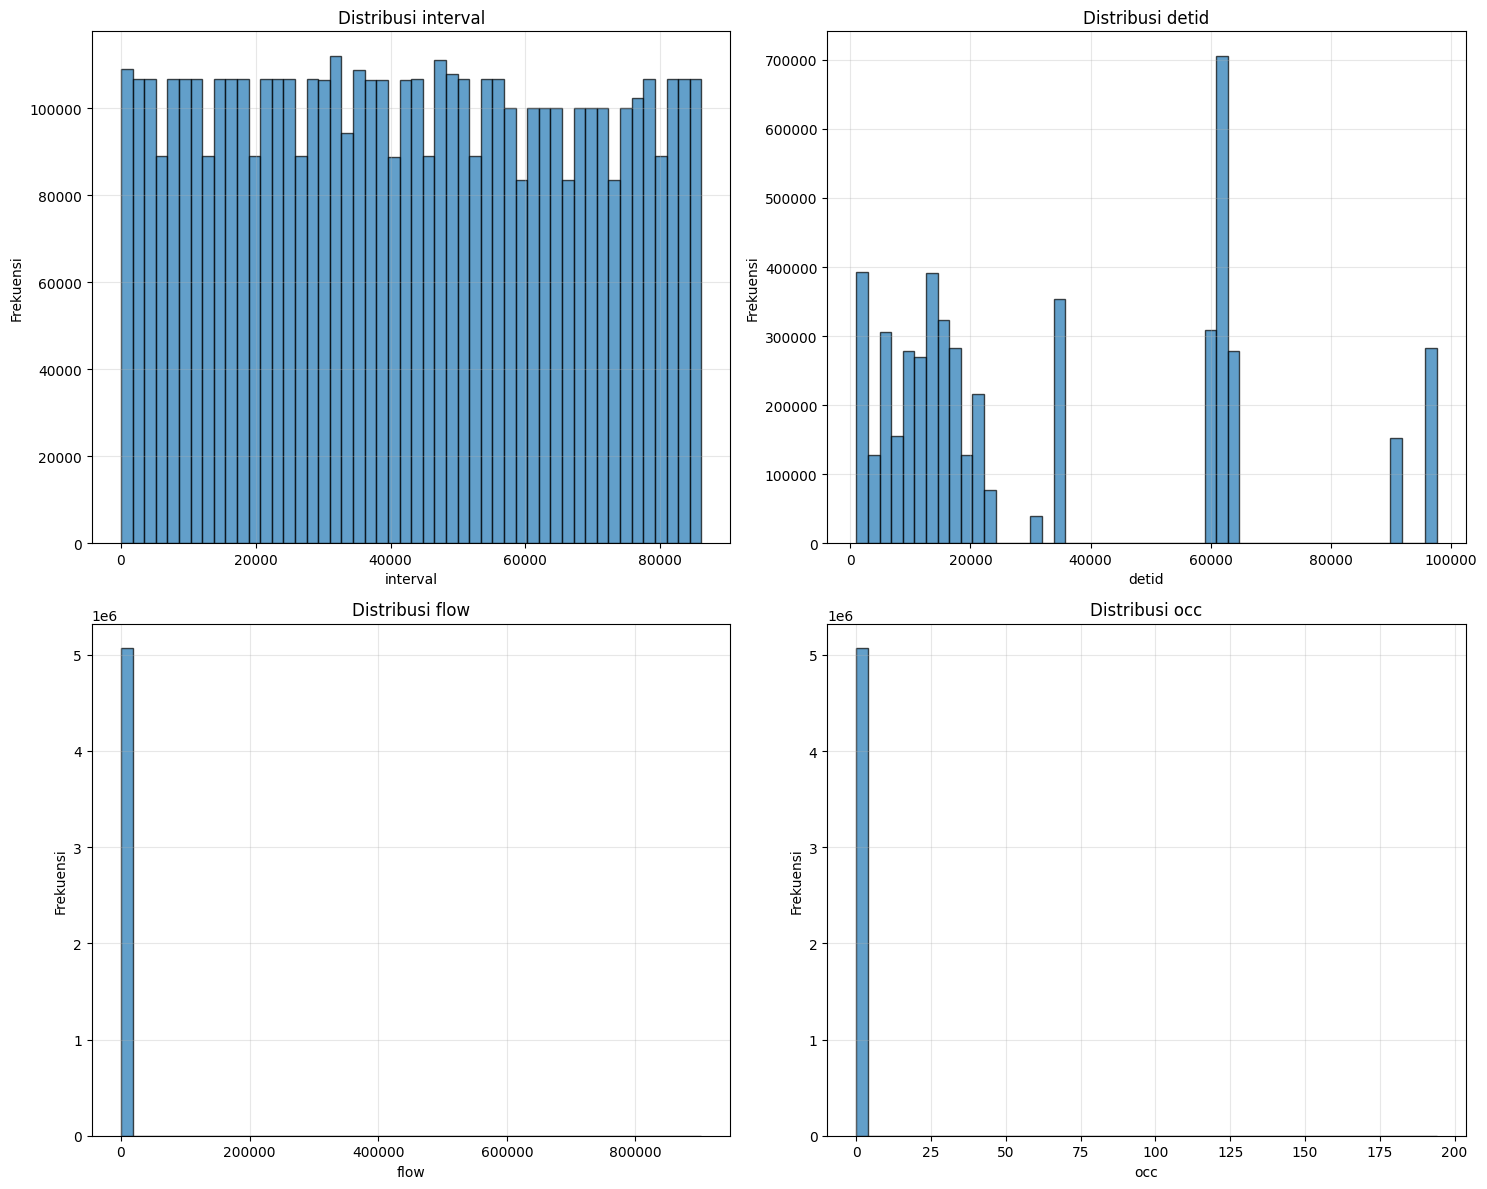

In [21]:
# Histogram untuk setiap kolom numerik
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=50, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Interpretasi Histogram:

1. **Interval**: Distribusi cukup merata sepanjang rentang waktu, menunjukkan data dikumpulkan secara konsisten
2. **DetID**: Memiliki beberapa puncak, menunjukkan ada detector tertentu yang lebih aktif dalam pengambilan data
3. **Flow**: Sangat skewed ke kanan dengan outlier ekstrem. Mayoritas data berkumpul di nilai rendah (dekat 0)
4. **Occ**: Juga sangat skewed ke kanan, sebagian besar nilai berada di rentang 0-25

Karena distribusi `flow` dan `occ` sangat skewed, mari kita buat visualisasi dengan transformasi logaritma:

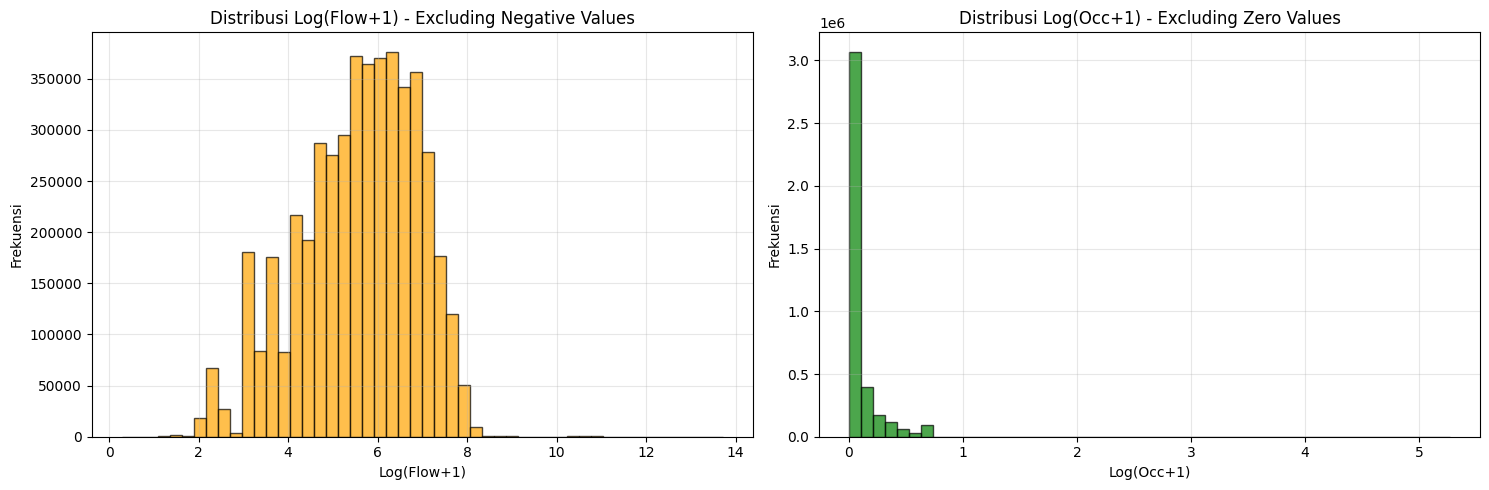

In [22]:
# Histogram dengan transformasi logaritma untuk variabel skewed
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Flow dengan log transform (tambah 1 untuk menghindari log(0))
df_temp = df[df['flow'] > 0]['flow']  # Exclude nilai negatif dan 0
axes[0].hist(np.log1p(df_temp), bins=50, alpha=0.7, edgecolor='black', color='orange')
axes[0].set_title('Distribusi Log(Flow+1) - Excluding Negative Values')
axes[0].set_xlabel('Log(Flow+1)')
axes[0].set_ylabel('Frekuensi')
axes[0].grid(True, alpha=0.3)

# Occ dengan log transform
df_temp_occ = df[df['occ'] > 0]['occ']
axes[1].hist(np.log1p(df_temp_occ), bins=50, alpha=0.7, edgecolor='black', color='green')
axes[1].set_title('Distribusi Log(Occ+1) - Excluding Zero Values')
axes[1].set_xlabel('Log(Occ+1)')
axes[1].set_ylabel('Frekuensi')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

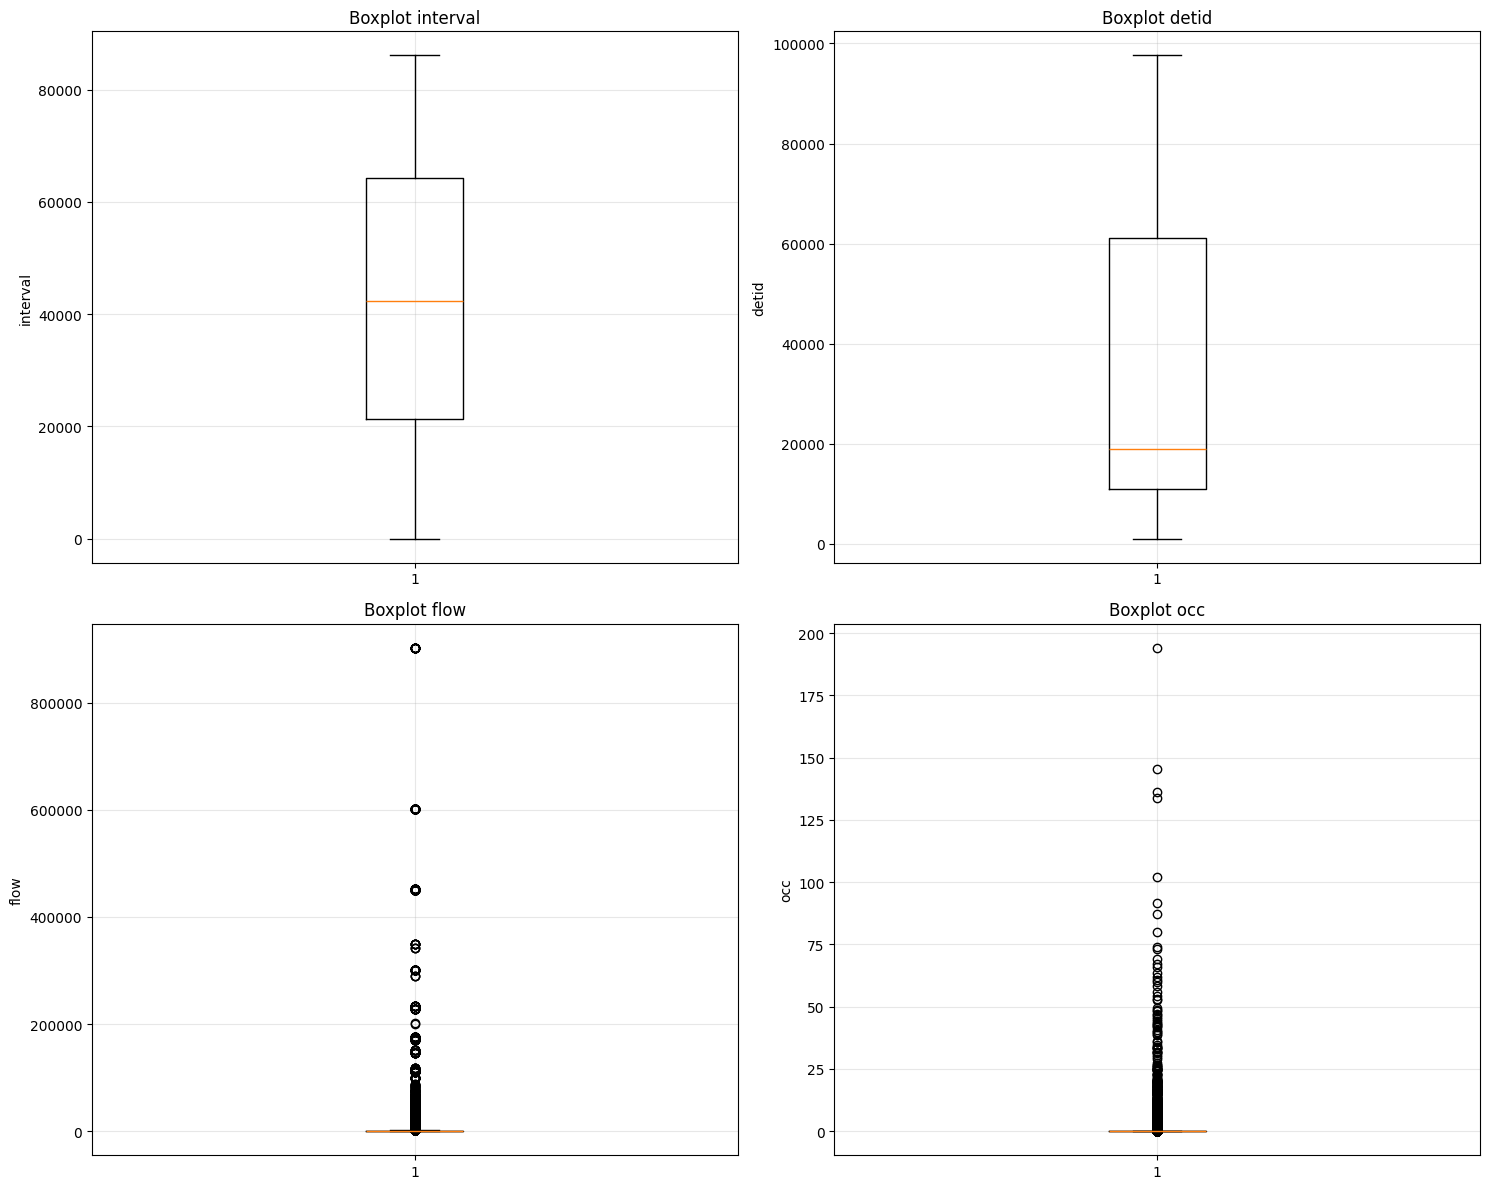

In [23]:
# Boxplot untuk deteksi outlier
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col], vert=True)
    axes[i].set_title(f'Boxplot {col}')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

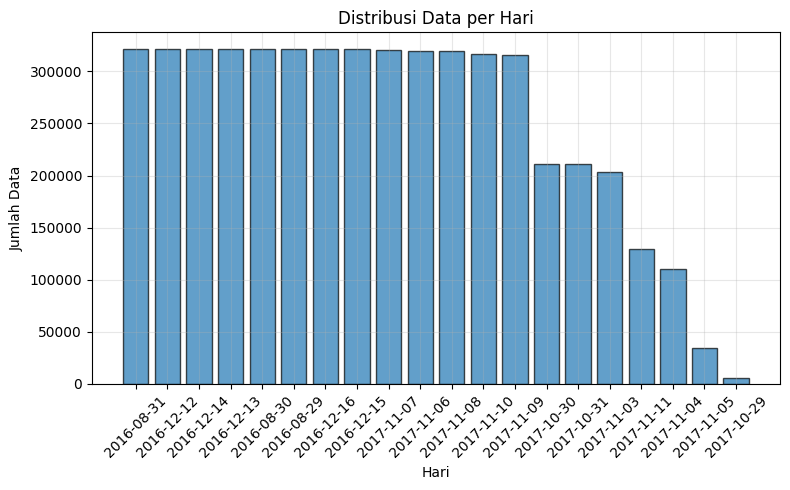

Detail distribusi variabel kategorikal:

Distribusi hari:
day
2016-08-31    321408
2016-12-12    321408
2016-12-14    321408
2016-12-13    321408
2016-08-30    321408
2016-08-29    321408
2016-12-16    321408
2016-12-15    321408
2017-11-07    320075
2017-11-06    319961
2017-11-08    319533
2017-11-10    317118
2017-11-09    316081
2017-10-30    211596
2017-10-31    211135
2017-11-03    203459
2017-11-11    129850
2017-11-04    110052
2017-11-05     34459
2017-10-29      5500
Name: count, dtype: int64


In [34]:
fig, ax = plt.subplots(figsize=(8, 5))

day_counts = df['day'].value_counts()
ax.bar(day_counts.index, day_counts.values, alpha=0.7, edgecolor='black')
ax.set_title('Distribusi Data per Hari')
ax.set_xlabel('Hari')
ax.set_ylabel('Jumlah Data')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Detail distribusi variabel kategorikal:")
print("\nDistribusi hari:")
print(day_counts)


### Interpretasi Analisis Univariate:

**Boxplot dan Outlier:**
- `Flow` dan `occ` memiliki outlier ekstrem yang sangat jauh dari kuartil ketiga
- `Interval` dan `detid` relatif tidak memiliki outlier yang signifikan
- Transformasi logaritma menunjukkan distribusi yang lebih normal untuk `flow`

**Variabel Kategorikal:**
- Data dikumpulkan dari **hanya satu kota: Madrid** 
- Data tersebar di **20 hari** yang berbeda antara Agustus 2016 - November 2017
- Distribusi data per hari tidak merata - beberapa hari memiliki lebih banyak data
- Agustus 2016 dan Desember 2016 memiliki volume data tertinggi

## Analisis Bivariate

### Korelasi antar Variabel Numerik

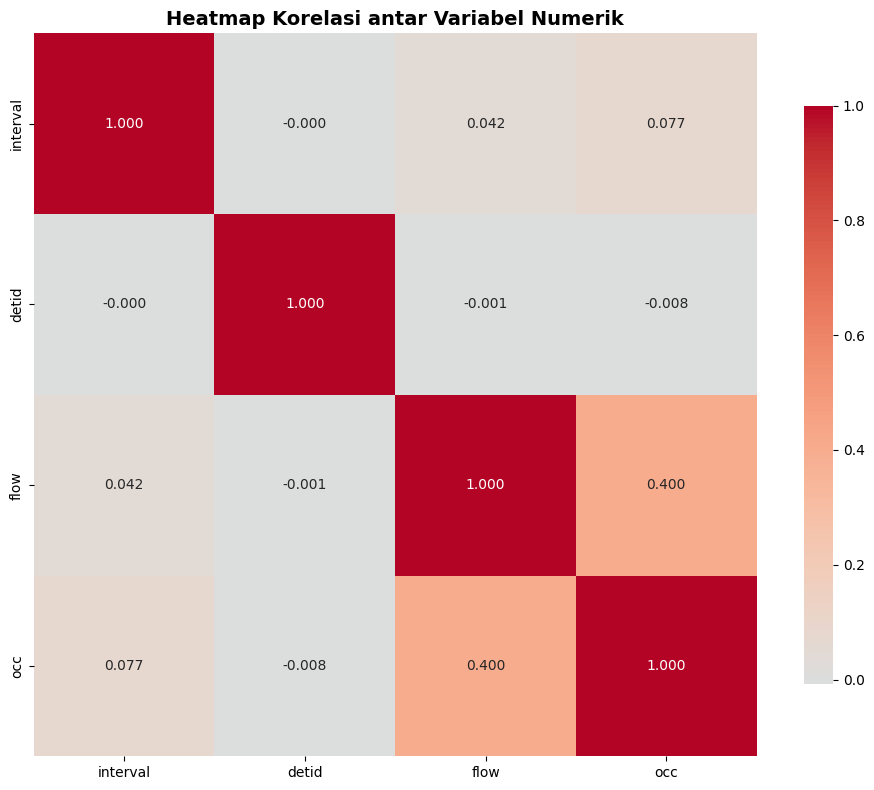

Korelasi Matrix:
          interval  detid   flow    occ
interval     1.000 -0.000  0.042  0.077
detid       -0.000  1.000 -0.001 -0.008
flow         0.042 -0.001  1.000  0.400
occ          0.077 -0.008  0.400  1.000


In [25]:
# Heatmap korelasi
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Heatmap Korelasi antar Variabel Numerik', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Korelasi Matrix:")
print(correlation_matrix.round(3))

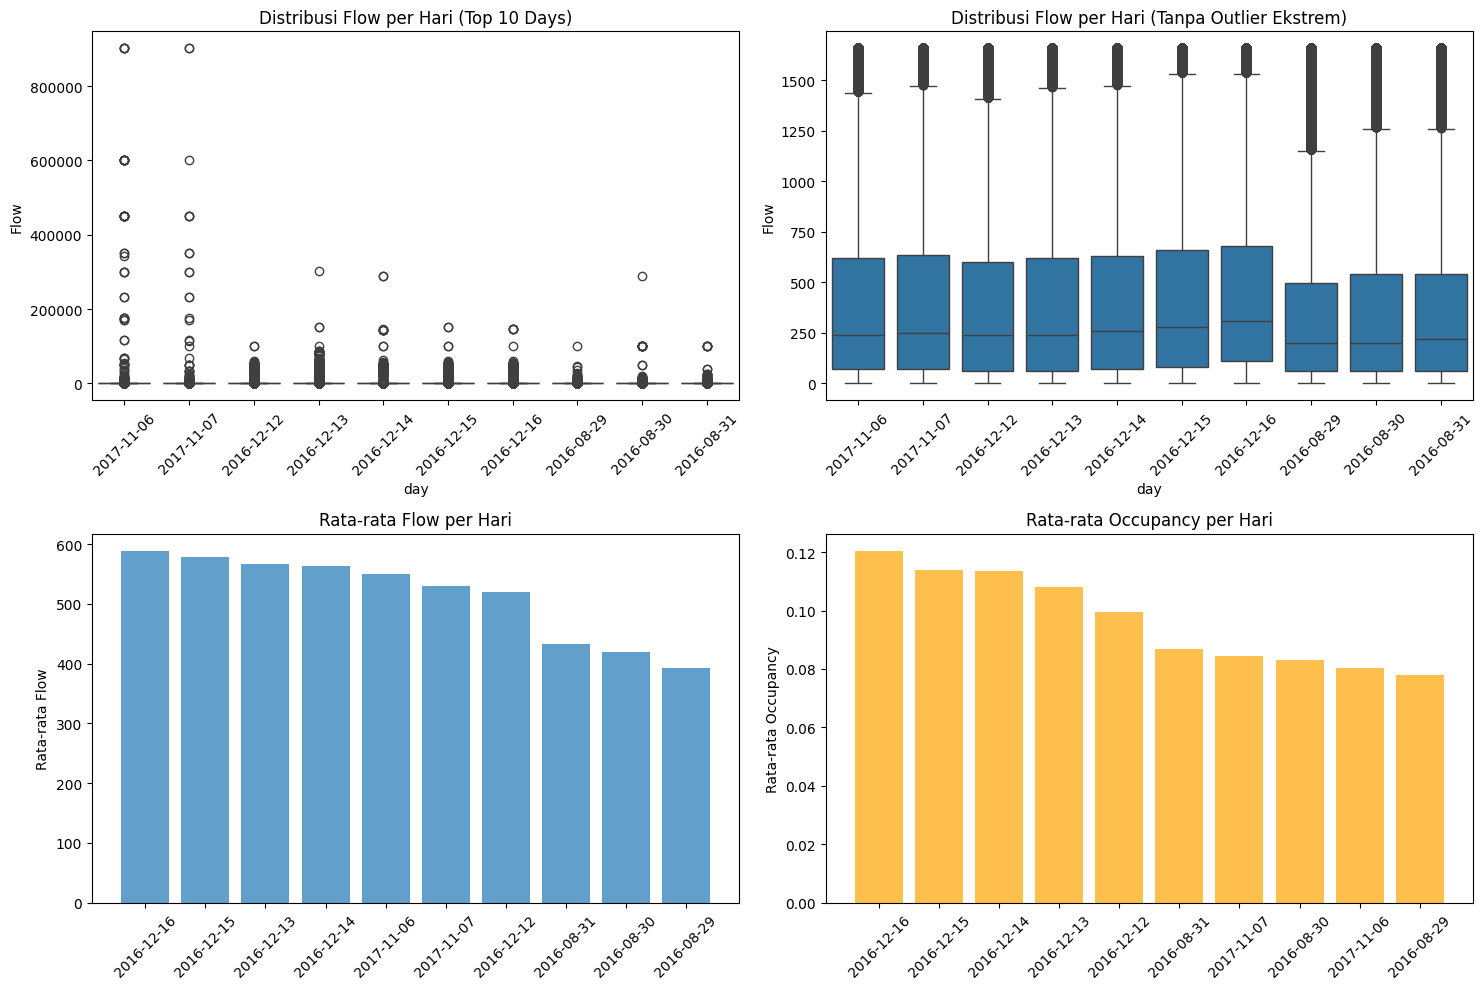

Statistik rata-rata Flow per hari:
day
2016-12-16    588.43
2016-12-15    578.56
2016-12-13    566.99
2016-12-14    563.55
2017-11-06    550.95
2017-11-07    529.91
2016-12-12    519.69
2016-08-31    432.66
2016-08-30    419.24
2016-08-29    392.69
Name: flow, dtype: float64

Statistik rata-rata Occupancy per hari:
day
2016-12-16    0.12
2016-12-15    0.11
2016-12-14    0.11
2016-12-13    0.11
2016-12-12    0.10
2016-08-31    0.09
2017-11-07    0.08
2016-08-30    0.08
2017-11-06    0.08
2016-08-29    0.08
Name: occ, dtype: float64


In [27]:
# Analisis hubungan variabel numerik vs kategorikal
# Flow berdasarkan hari (sample beberapa hari karena terlalu banyak)
plt.figure(figsize=(15, 10))

# Ambil 10 hari dengan data terbanyak
top_days = df['day'].value_counts().head(10).index
df_subset = df[df['day'].isin(top_days)]

# Boxplot Flow per hari
plt.subplot(2, 2, 1)
sns.boxplot(data=df_subset, x='day', y='flow')
plt.title('Distribusi Flow per Hari (Top 10 Days)')
plt.xticks(rotation=45)
plt.ylabel('Flow')

# Boxplot dengan batasan untuk memperjelas (tanpa outlier ekstrem)
plt.subplot(2, 2, 2)
flow_95 = df['flow'].quantile(0.95)
df_no_outlier = df_subset[df_subset['flow'] <= flow_95]
sns.boxplot(data=df_no_outlier, x='day', y='flow')
plt.title('Distribusi Flow per Hari (Tanpa Outlier Ekstrem)')
plt.xticks(rotation=45)
plt.ylabel('Flow')

# Rata-rata Flow per hari
plt.subplot(2, 2, 3)
daily_avg = df_subset.groupby('day')['flow'].mean().sort_values(ascending=False)
plt.bar(range(len(daily_avg)), daily_avg.values, alpha=0.7)
plt.title('Rata-rata Flow per Hari')
plt.xticks(range(len(daily_avg)), daily_avg.index, rotation=45)
plt.ylabel('Rata-rata Flow')

# Rata-rata Occupancy per hari
plt.subplot(2, 2, 4)
daily_avg_occ = df_subset.groupby('day')['occ'].mean().sort_values(ascending=False)
plt.bar(range(len(daily_avg_occ)), daily_avg_occ.values, alpha=0.7, color='orange')
plt.title('Rata-rata Occupancy per Hari')
plt.xticks(range(len(daily_avg_occ)), daily_avg_occ.index, rotation=45)
plt.ylabel('Rata-rata Occupancy')

plt.tight_layout()
plt.show()

print("Statistik rata-rata Flow per hari:")
print(daily_avg.round(2))
print("\nStatistik rata-rata Occupancy per hari:")
print(daily_avg_occ.round(2))

### Interpretasi Analisis Bivariate:

**Korelasi antar Variabel:**
- **Flow dan Occupancy (r=0.400)**: Korelasi positif sedang - semakin tinggi arus lalu lintas, semakin tinggi juga tingkat okupansi jalan
- **Interval dengan Flow/Occ (r=0.042/0.077)**: Korelasi sangat lemah, menunjukkan interval waktu tidak berpengaruh signifikan
- **DetID**: Tidak berkorelasi dengan variabel lain, menunjukkan ID detector hanya sebagai identifier

**Pola Temporal:**
- **Desember 2016** memiliki rata-rata flow dan occupancy tertinggi (musim winter/liburan)
- **Agustus 2016** memiliki rata-rata flow dan occupancy lebih rendah (musim panas/liburan)
- **November 2017** berada di rentang menengah

**Hubungan Flow-Occupancy:**
- Scatter plot menunjukkan hubungan non-linear yang kuat di rentang normal
- Setelah menghilangkan outlier ekstrem, terlihat pola yang lebih jelas
- Mayoritas data berkumpul di nilai rendah dengan beberapa outlier ekstrem

## Kesimpulan EDA

### Ringkasan Temuan Utama:

1. **Kualitas Data:**
   - Dataset memiliki 5,070,083 record dari Madrid
   - Tidak ada missing values atau duplicates
   - Ada nilai negatif pada kolom `flow` yang perlu investigasi lebih lanjut

2. **Distribusi Data:**
   - `Flow` dan `occ` memiliki distribusi sangat skewed dengan outlier ekstrem
   - Mayoritas flow berada di rentang rendah (median = 270)
   - Transformasi logaritma memperbaiki distribusi untuk analisis lebih lanjut

3. **Korelasi:**
   - **Flow ↔ Occupancy**: Korelasi positif sedang (r=0.400) - hubungan yang masuk akal
   - Variabel temporal (`interval`) memiliki korelasi lemah dengan traffic metrics

4. **Pola Temporal:**
   - Data dari periode Agustus 2016 - November 2017
   - Desember 2016 menunjukkan traffic tertinggi
   - Pola seasonal mungkin berkaitan dengan liburan dan aktivitas kota

5. **Outlier dan Anomali:**
   - Terdapat outlier ekstrem pada flow (max = 902,403) dan occupancy
   - Outlier ini mungkin merepresentasikan kondisi khusus atau error pengukuran
